Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This project is focused on training a machine learning model to be able to predict the target outcome, which is a customer making a booking. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Exploratory Data Analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# Getting information about data types of the columns and to check if null values are present 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

We can see that the dataset contains 5 character variables and 7 numerical variables.

booking_complete is the target variable

There are also no null values in the dataset

In [4]:
# Getting summary of descriptive statistics of the numeric columns in the dataset  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


The above command df.describe().T helps us to view the statistical properties of numerical variables. It excludes character variables. 

In [5]:
#Find and preview Categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


In [6]:
print(round(df[categorical].loc[:,'sales_channel'].to_frame().value_counts(normalize = True)*100,0).astype(str) + "%")
print(round(df[categorical].loc[:,'trip_type'].to_frame().value_counts(normalize = True)*100,0).astype(str) + "%")
print(round(df[categorical].loc[:,'flight_day'].to_frame().value_counts(normalize = True)*100,0).astype(str) + "%")
print((round(df[categorical].loc[:,'route'].to_frame().value_counts(normalize = True)*100,0).astype(str) + "%")[:5])
print((round(df[categorical].loc[:,'booking_origin'].to_frame().value_counts(normalize = True)*100,0).astype(str) + "%")[:10])

sales_channel
Internet         89.0%
Mobile           11.0%
dtype: object
trip_type 
RoundTrip     99.0%
OneWay         1.0%
CircleTrip     0.0%
dtype: object
flight_day
Mon           16.0%
Wed           15.0%
Tue           15.0%
Thu           15.0%
Fri           14.0%
Sun           13.0%
Sat           12.0%
dtype: object
route 
AKLKUL    5.0%
PENTPE    2.0%
MELSGN    2.0%
ICNSIN    2.0%
DMKKIX    1.0%
dtype: object
booking_origin
Australia         36.0%
Malaysia          14.0%
South Korea        9.0%
Japan              8.0%
China              7.0%
Indonesia          5.0%
Taiwan             4.0%
Thailand           4.0%
India              3.0%
New Zealand        2.0%
dtype: object


In [7]:
#Explore the target variable (booking_complete)
round(df['booking_complete'].value_counts(normalize = True)*100,0).astype(str) + "%"

0    85.0%
1    15.0%
Name: booking_complete, dtype: object

In [8]:
#naming the target variable
mapping = {0:"no booking completed",
1:"booking completed"}
df['target names'] = df['booking_complete'].map(mapping)

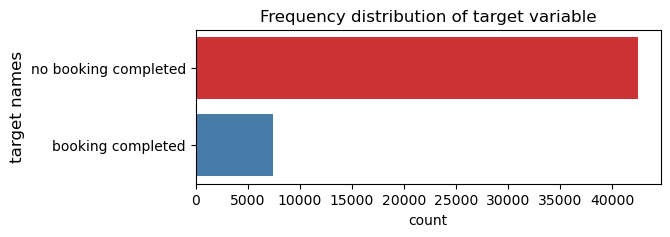

In [9]:
plt.figure(figsize=(6, 2))
ax = sns.countplot(y = "target names", data = df, palette = "Set1")
ax.set_title("Frequency distribution of target variable", fontsize = 12)
plt.ylabel("target names", fontsize = 12)
plt.show()

85% of bookings did not get completed

In [11]:
#Exploring numeric variables
#plot correlation heatmap to find out correlations
heatmap = df.drop(['booking_complete'], axis = 1).corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [12]:
heatmap

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
num_passengers,1.0,0.2126,-0.1158,0.01561,0.1204,0.02854,0.02294,-0.06317
purchase_lead,0.2126,1.0,-0.07656,0.03597,-0.02221,-0.004499,-0.02265,0.06787
length_of_stay,-0.1158,-0.07656,1.0,-0.02487,0.1768,0.03226,0.09883,0.1412
flight_hour,0.01561,0.03597,-0.02487,1.0,-0.01143,0.01217,0.01301,-0.002101
wants_extra_baggage,0.1204,-0.02221,0.1768,-0.01143,1.0,0.2077,0.2165,0.05705
wants_preferred_seat,0.02854,-0.004499,0.03226,0.01217,0.2077,1.0,0.3151,0.1013
wants_in_flight_meals,0.02294,-0.02265,0.09883,0.01301,0.2165,0.3151,1.0,0.1543
flight_duration,-0.06317,0.06787,0.1412,-0.002101,0.05705,0.1013,0.1543,1.0


We can see that there is no strong correlation between the numeric variables.

# Declare feature vector and target variable

In [13]:
X = df.drop(['booking_complete', 'target names'], axis=1)

y = df['booking_complete']

In [14]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

# Split data into separate training and test set 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3, stratify = y)

In [17]:
# check the shape of X_train and X_test
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000, 13)
(35000, 13)
(15000, 13)


In [18]:
# check the shape of y_train and y_test
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(50000,)
(35000,)
(15000,)


# Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [19]:
# Display categorical variables in training set
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [20]:
# Display numerical variables in training set
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

In [21]:
# preview categorical variables in X_train
X_train[categorical].head()

,sales_channel,trip_type,flight_day,route,booking_origin
20888,Internet,RoundTrip,Thu,MELTRZ,Australia
4417,Internet,RoundTrip,Mon,CGKSYD,Indonesia
1322,Mobile,RoundTrip,Tue,AKLKUL,New Zealand
20367,Internet,RoundTrip,Fri,MELSGN,Australia
35791,Mobile,RoundTrip,Sun,CGKKIX,Indonesia


In [22]:
# encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"])
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.transform(X_test)

In [23]:
print(X_train_encode.shape)
print(X_test_encode.shape)

(35000, 886)
(15000, 886)


In [24]:
X_train_encode.head()

,num_passengers,sales_channel_1,sales_channel_2,trip_type_1,trip_type_2,trip_type_3,purchase_lead,length_of_stay,flight_hour,flight_day_1,...,booking_origin_84,booking_origin_85,booking_origin_86,booking_origin_87,booking_origin_88,booking_origin_89,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
20888,1,1,0,1,0,0,6,57,3,1,...,0,0,0,0,0,0,0,0,0,8.83
4417,1,1,0,1,0,0,63,19,2,0,...,0,0,0,0,0,0,0,1,0,8.58
1322,1,0,1,1,0,0,96,30,3,0,...,0,0,0,0,0,0,1,0,1,8.83
20367,1,1,0,1,0,0,125,23,10,0,...,0,0,0,0,0,0,1,0,0,8.83
35791,1,0,1,1,0,0,12,5,8,0,...,0,0,0,0,0,0,0,0,0,7.00


# Using Random Forest Classifier for predictive modelling

In [25]:
rf = RandomForestClassifier(random_state = 0, n_estimators = 100) #The number of trees in the forest is 100

In [26]:
rf.fit(X_train_encode, y_train) #Fit the model
y_pred = rf.predict(X_test_encode) #Predict the Test set results
accuracy = accuracy_score(y_test, y_pred) #Check accuracy score 
print(accuracy)

0.8496


Model accuracy score with 100 decision-trees : 0.8496

Using 10 and 200 decision-trees to see its effect on accuracy of the model

In [27]:
rf1 = RandomForestClassifier(random_state = 0, n_estimators = 10) #The number of trees in the forest is 10

In [28]:
rf1.fit(X_train_encode, y_train) #Fit the model
y_pred1 = rf1.predict(X_test_encode) #Predict the Test set results
accuracy1 = accuracy_score(y_test, y_pred1) #Check accuracy score 
print(accuracy1)

0.8479333333333333


In [29]:
rf2 = RandomForestClassifier(random_state = 0, n_estimators = 200) #The number of trees in the forest is 200

In [30]:
rf2.fit(X_train_encode, y_train) #Fit the model
y_pred2 = rf2.predict(X_test_encode) #Predict the Test set results
accuracy2 = accuracy_score(y_test, y_pred2) #Check accuracy score 
print(accuracy2)

0.8514666666666667


Using 10 decision-trees, the accuracy is 0.8479 and for 200 decision-trees, the accuracy is 0.8515. 
Therefore, the accuracy increases with the number of decision trees in the model

# Find important features with Random Forest model

In [31]:
feature_scores = pd.Series(rf.feature_importances_, index = X_train_encode.columns).sort_values(ascending=False)
feature_scores

purchase_lead      1.439916e-01
flight_hour        1.203732e-01
length_of_stay     1.105579e-01
num_passengers     4.736638e-02
flight_duration    3.725936e-02
                       ...     
route_730          1.032786e-07
route_596          2.000296e-08
route_754          1.405189e-08
route_770          1.213258e-08
route_757          8.675848e-09
Length: 886, dtype: float64

In [32]:
#Top ten features with the highest contribution to the predictive power of the model
feature_scores[:10]

purchase_lead            0.143992
flight_hour              0.120373
length_of_stay           0.110558
num_passengers           0.047366
flight_duration          0.037259
booking_origin_6         0.028427
wants_in_flight_meals    0.023267
booking_origin_1         0.020567
wants_preferred_seat     0.018801
wants_extra_baggage      0.018367
dtype: float64

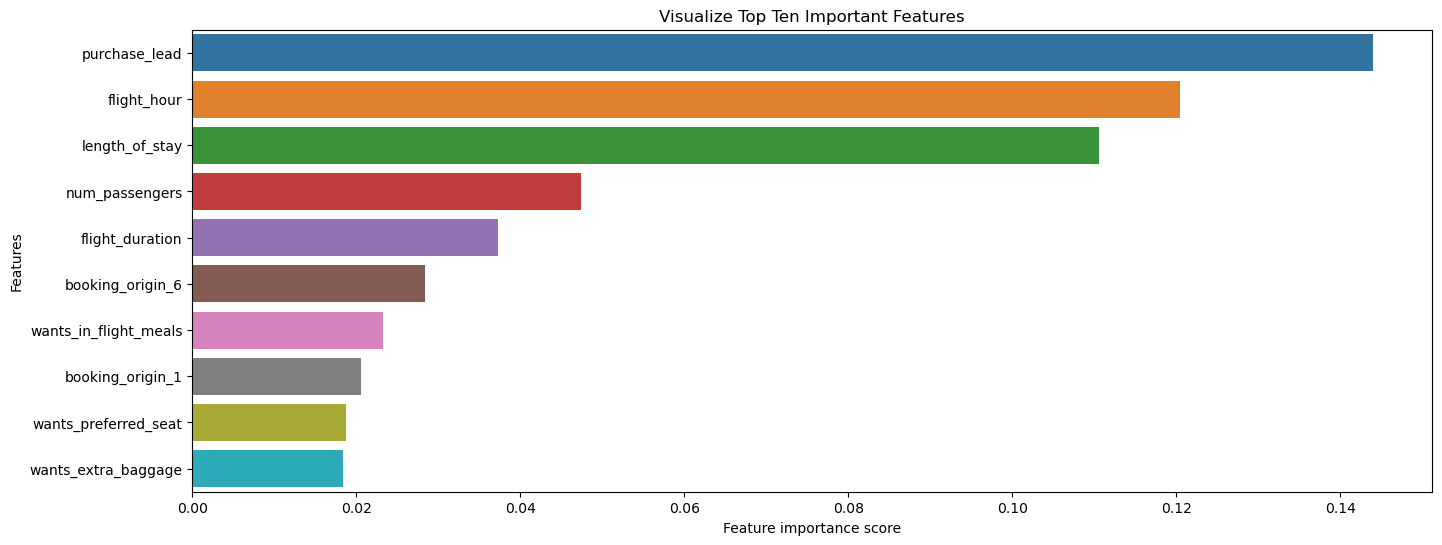

In [33]:
f, ax = plt.subplots(figsize = (16, 6))
ax = sns.barplot(x = feature_scores[:10], y = feature_scores.index[:10], data = df)
ax.set_title("Visualize Top Ten Important Features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig(r"C:\Users\Oreoluwa\Downloads\feature importance.png")
plt.show()

Purchase lead is the most contributing feature to the model

In [34]:
#Using the top 5 features only to build the model
X_train_new = X_train[['purchase_lead', 'flight_hour', 'length_of_stay', 'num_passengers', 'flight_duration']]
X_test_new = X_test[['purchase_lead', 'flight_hour', 'length_of_stay', 'num_passengers', 'flight_duration']]

In [35]:
rf3 = RandomForestClassifier(random_state = 0, n_estimators = 100) #The number of trees in the forest is 100
rf3.fit(X_train_new, y_train) #Fit the model
y_pred3 = rf3.predict(X_test_new) #Predict the Test set results
accuracy3 = accuracy_score(y_test, y_pred3) #Check accuracy score 
print(accuracy3)

0.8331333333333333


The accuracy score reduces to 0.8331 when the only the top 5 features were used, this shows that we cannot rely on these top features alone to build a good model

# Confusion matrix

This is used to evaluate the performance of the model

In [36]:
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cm)

[[12487   270]
 [ 1986   257]]


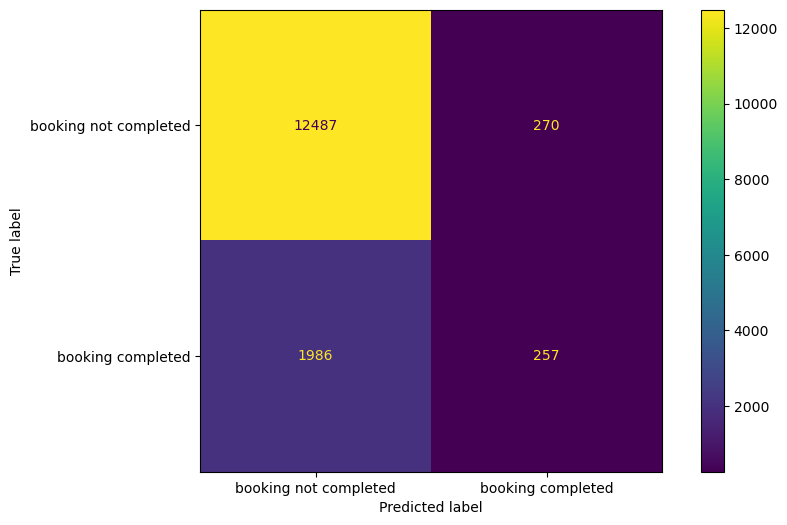

In [37]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['booking not completed', 'booking completed'])
fig, ax = plt.subplots(figsize=(10,6))
cm_disp.plot(ax=ax)
plt.savefig(r"C:\Users\Oreoluwa\Downloads\cm map.png")

From this, the model predicted 12,487 True Negative, 1,986 False Positive, 270 False Negative and 257 True Positive.

# Conclusion

- In this project, I built a predictive model using Random Forest Classifier to predict the target output which is a customer making a booking.
- The model accuracy score with 100 decision-trees is 0.8496, with 10 decision-trees is 0.8479 and with 200 decision-trees is 0.8515. So, as expected accuracy increases with number of decision-trees in the model.
- The most important feature in the model is Purchase lead. Others top features include Flight hour, Length of stay, Number of passengers, Flight duration.
- Using these top five features only to build the model, the accuracy score reduces to 0.8331. This shows that we cannot rely on these top features alone to build a good model.
- 12,487 of bookings not completed was accurately predicted by the model and 257 of bookings completed was accurately predicted by the model. Therefore, 85% of predictions were correct.
- The bookings that were not completed out number the completed bookings.

# Recommendation

85% of predictions from the model was correct showing that the model might require a slight improvement. I suggest adding more customer-centric features into the model.
